<a href="https://colab.research.google.com/github/vondersam/sdgs_text_classifier/blob/master/experiments/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import spacy
from collections import Counter
from  itertools import chain

# Code heavily inspired from the following posts
# http://www.davidsbatista.net/blog/2017/04/01/document_classification/
# https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [0]:
#!python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_dir = "gdrive/My Drive/fastai-v3/sdgs/dataset/"
labelled_dataset = base_dir + "cleanup_labelled.csv"
unlabelled_dataset = base_dir + "cleanup_unlabelled_u.csv"

Mounted at /content/gdrive


In [28]:
labelled = pd.read_csv(labelled_dataset)
labelled['labels'] = labelled.labels.str.split('|')
labelled.head()


,text,labels,doc_id
0,Goal 8: Decent work and economic growth,[8],downloadable_pdfs/http:__www.dev.sdgfund.org_%...
1,The day after receiving the 2016 Pritzker Laur...,[11],downloadable_pdfs/http:__www.dev.sdgfund.org_a...
2,"For Paloma Duran, SDG Fund director, this proj...",[16],downloadable_pdfs/http:__www.dev.sdgfund.org_b...
3,"Rangita de Silva, Associate Dean of the Univer...",[5],downloadable_pdfs/http:__www.dev.sdgfund.org_b...
4,"The SDG Fund, an interagency mechanism establi...",[16],downloadable_pdfs/http:__www.dev.sdgfund.org_b...


# Unlabelled Data

In [19]:
unlabelled = pd.read_csv(unlabelled_dataset)
# Number of total tokens
#unlabelled['tokens'] = unlabelled['text'].apply(lambda x: nlp(x))
print(f"Number of unlabelled texts: {unlabelled.count()['text']}")

Number of unlabelled texts: 248303


# Labelled Data

## Number of texts per label

In [104]:
txt_per_label = pd.Series(Counter(chain(*labelled.labels))).sort_index().rename_axis('label_id').reset_index(name='count')
txt_per_label.label_id = df.label_id.astype('int')
txt_per_label.sort_values(by='label_id', inplace=True)
txt_per_label

,label_id,count
0,1,438
9,2,457
10,3,523
11,4,381
12,5,482
13,6,423
14,7,477
15,8,395
16,9,301
1,10,317


Text(0.5, 1.0, 'Number of documents per label')

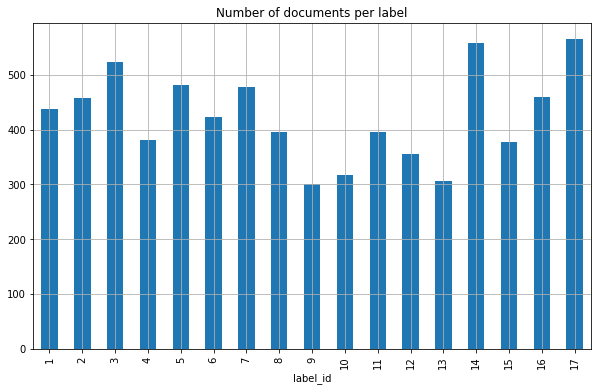

In [105]:
txt_per_label.plot(x='label_id', y='count', kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number of documents per label")

# Number of labels per text

In [154]:
labels_per_text = labelled.labels.str.len()
labels_per_text = labels_per_text.value_counts().sort_index()
labels_per_text

# Average of string length
# Min string length
# Max string length


#df_sdgs = labelled.drop(['text'], axis=1)
#counts = []
#categories = list(df_sdgs.labels.values); categories
#for i in categories:
#    counts.append((i, df_sdgs[i].sum()))
#df_stats = pd.DataFrame(counts, columns=['sdg', 'No. texts'])
#df_stats = pd.DataFrame(counts, columns=['sdg', '#texts']).to_latex(column_format='lr')
#df_stats

1     4419
2      317
3      159
4       84
5       80
6       47
7       40
8       12
9        3
10       3
11       7
12       3
14       3
15       3
16       1
17       1
Name: labels, dtype: int64

Text(0.5, 1.0, 'Number labels per document')

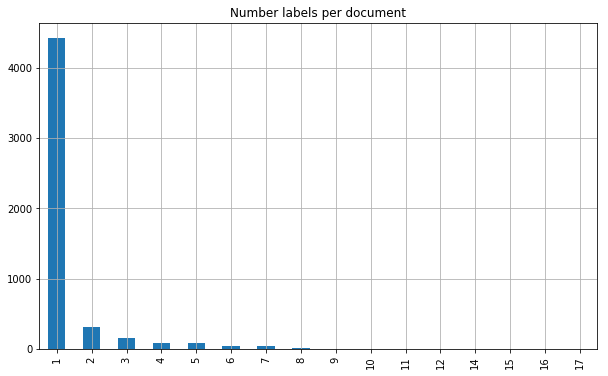

In [155]:
labels_per_text.plot(kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number labels per document")